In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


Now let’s compute θusing the Normal Equation. We will use the inv() function from
NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and
the dot() method for matrix multiplication:

In [5]:
#The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.
#Let’s see what the equation found:
theta_best

array([[3.73917587],
       [3.30809885]])

When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict


array([[ 3.73917587],
       [10.35537356]])

To implement Gradient Descent, you need to compute the gradient of the cost func‐
tion with regards to each model parameter θj
. In other words, you need to calculate
how much the cost function will change if you change θj
just a little bit. This is called
a partial derivative. It is like asking “what is the slope of the mountain under my feet
if I face east?” and then asking the same question facing north (and so on for all other
dimensions, if you can imagine a universe with more than three dimensions). Equa‐
tion 4-5 computes the partial derivative of the cost function with regards to parame‐
ter θj
, noted ∂
∂θ
j
MSE θ .

In [7]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each
iteration (SGD can be implemented as an out-of-core algorithm.7
)


In [9]:
On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on aver‐
age. Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down (see Figure 4-9). So once the algo‐
rithm stops, the final parameter values are good, but not optimal.


SyntaxError: invalid syntax (<ipython-input-9-8602db69e634>, line 1)

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.69202511]), array([3.28262074]))

Mini-batch Gradient Descent
The last Gradient Descent algorithm we will look at is called Mini-batch Gradient
Descent. It is quite simple to understand once you know Batch and Stochastic Gradi‐
ent Descent: at each step, instead of computing the gradients based on the full train‐
ing set (as in Batch GD) or based on just one instance (as in Stochastic GD), MiniGradient Descent | 121

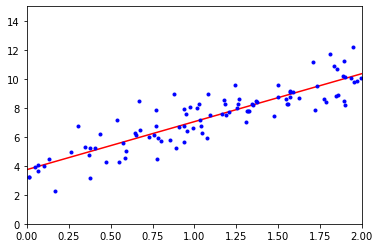

In [15]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)


LinearRegression()

In [17]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([3.73917587]), array([[3.30809885]]))

### Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

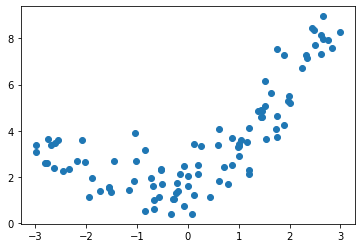

In [19]:
plt.scatter(X,y)

In [30]:
X[0]

array([-1.27196275])

In [21]:
from sklearn.preprocessing import PolynomialFeatures##ferneis to fueature
poly_features = PolynomialFeatures(degree=2, include_bias=False)#to kaleis
X_poly = poly_features.fit_transform(X) #ftiaxneis to class pou exei tin formula apply sto x mas

In [23]:
X[0]

array([-2.76912015])

In [24]:
X_poly[0]

array([-2.76912015,  7.66802643])

In [25]:
lin_reg = LinearRegression() 
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_


(array([1.93471569]), array([[0.93109153, 0.50745246]]))

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it per‐
forms poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.
Another way is to look at the learning curves: these are plots of the model’s perfor‐
mance on the training set and the validation set as a function of the training set size
(or the training iteration). To generate the plots, simply train the model several times
on different sized subsets of the training set. The following code defines a function
that plots the learning curves of a model given some training data:



In Chapter 2 you used cross-validation to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it per‐
forms poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.


In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
        


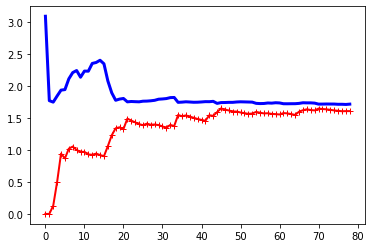

In [42]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(polynomial_regression, X, y)


Ridge Regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Lin‐
ear Regression: a regularization term equal to α∑i = 1
n
θi
2
 is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure

The hyperparameter α controls how much you want to regularize the model. If α = 0

In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([8.61595622])

In [44]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([4.67381945])

The penalty hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the ℓ2
 norm of the weight vector: this is simply Ridge
Regression.


Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2
 norm (see Equation 4-10).


An important characteristic of Lasso Regression is that it tends to completely elimi‐
nate the weights of the least important features (i.e., set them to zero). For example,
the dashed line in the right plot on Figure 4-18 (with α = 10-7) looks quadratic, almost
linear: all the weights for the high-degree polynomial features are equal to zero. In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

In [45]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.65131976])

So when should you use plain Linear Regression (i.e., without any regularization),
Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are actually useful, you should pre‐
fer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to
zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso
may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

In [47]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Nomitech\Desktop\Anek\Melbourne_housing_FULL.csv")

In [48]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [51]:
cols_to_use=['Suburb','Rooms',"Type","Method","SellerG","Regionname","Propertycount","Distance",
            "CouncilArea","Bedroom2","Bathroom","Car","Landsize","BuildingArea","Price"]

In [52]:
df=df[cols_to_use]


In [53]:
df.shape

(34857, 15)

In [55]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [56]:
cols_to_fill_zero=['Propertycount','Distance','Bedroom2','Bathroom','Car']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

C:\Users\Nomitech\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [57]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [58]:
df['Landsize']=df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea']=df['BuildingArea'].fillna(df.BuildingArea.mean())

<ipython-input-58-c1fce6a192fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize']=df['Landsize'].fillna(df.Landsize.mean())
<ipython-input-58-c1fce6a192fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BuildingArea']=df['BuildingArea'].fillna(df.BuildingArea.mean())


In [59]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [60]:
df.dropna(inplace=True)

<ipython-input-60-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [61]:
df=pd.get_dummies(df,drop_first=True)

In [62]:
df

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.000000,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.000000,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.000000,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.000000,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.000000,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6543.0,6.3,4.0,1.0,3.0,593.000000,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,0,0
34853,2,6543.0,6.3,2.0,2.0,1.0,98.000000,104.0000,888000.0,0,...,0,0,0,0,0,0,0,0,0,0
34854,2,6543.0,6.3,2.0,1.0,2.0,220.000000,120.0000,705000.0,0,...,0,0,0,0,0,0,0,0,0,0
34855,3,6543.0,6.3,0.0,0.0,0.0,593.598993,160.2564,1140000.0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
x=df.drop('Price',axis=1)
y=df['Price']

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)

In [65]:
reg.predict(x_test)

array([1672988.74421188, 1086049.72134419,  852828.79001489, ...,
        891754.56465477,  783898.88694734, 1170611.74699076])

In [66]:
reg.score(x_test,y_test)

0.1385368316158937

In [67]:
reg.score(x_train,y_train)
##Opws vlepeis overfitting sto test set dinei kako accuracy enw sto train  dinei kalo
##Lasso regression dinei l1 regularization


0.6827792395792723

In [68]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

C:\Users\Nomitech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326631542478297.5, tolerance: 796258688308222.5
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [69]:
lasso_reg.predict(x_test)

array([1675386.13328946, 1090665.28984345,  885857.08269037, ...,
        907941.7324018 ,  792220.8275921 , 1201124.42188506])

In [70]:
lasso_reg.score(x_test,y_test)

0.6636111369404488

In [71]:
lasso_reg.score(x_train,y_train)

0.6766985624766824

In [77]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [78]:
ridge_reg.score(x_test,y_test)

0.6670848945194958

# Logistic Regression

In [79]:
from sklearn import datasets
iris = datasets.load_iris()

In [80]:
 X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0


<ipython-input-80-882c384bd200>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0


In [84]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

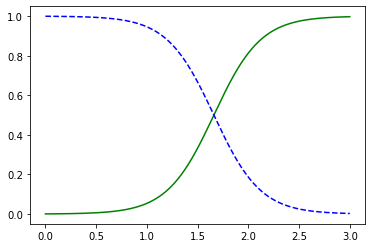

In [85]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")


In [86]:
log_reg.predict([[1.7], [1.5]])


array([1, 0])

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of over‐
lap. Above about 2 cm the classifier is highly confident that the flower is an IrisVirginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class). In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an IrisVirginica, or else it will predict that it is not (even if it is not very confident):
